In [44]:
import keras
import tensorflow as tf
from tensorflow.keras import layers, models
import os
import cv2
import numpy as np

Data Preprocessing

In [47]:
import pandas as pd

# Load the CSV file
csv_file = "/home/sakshi/ACL_Digital_Internship/Regensburg Pediatric Appendicitis/Dataset/data.csv"
data = pd.read_csv(csv_file)

# Display the first few rows
print(data.head())


     Age   BMI     Sex  Height  Weight  Length_of_Stay    Management  \
0  12.68  16.9  female   148.0    37.0             3.0  conservative   
1  14.10  31.9    male   147.0    69.5             2.0  conservative   
2  14.14  23.3  female   163.0    62.0             4.0  conservative   
3  16.37  20.6  female   165.0    56.0             3.0  conservative   
4  11.08  16.9  female   163.0    45.0             3.0  conservative   

        Severity Diagnosis_Presumptive        Diagnosis  ...  \
0  uncomplicated          appendicitis     appendicitis  ...   
1  uncomplicated          appendicitis  no appendicitis  ...   
2  uncomplicated          appendicitis  no appendicitis  ...   
3  uncomplicated          appendicitis  no appendicitis  ...   
4  uncomplicated          appendicitis     appendicitis  ...   

   Abscess_Location  Pathological_Lymph_Nodes Lymph_Nodes_Location  \
0               NaN                       yes                 reUB   
1               NaN                       

In [48]:
# Check for missing values
print(data.isnull().sum())

# Ensure the target columns are present
target_columns = ["Diagnosis", "Management", "Severity"]
print(data[target_columns].head())


Age                                   1
BMI                                  27
Sex                                   2
Height                               26
Weight                                3
Length_of_Stay                        4
Management                            1
Severity                              1
Diagnosis_Presumptive                 2
Diagnosis                             2
Alvarado_Score                       52
Paedriatic_Appendicitis_Score        52
Appendix_on_US                        5
Appendix_Diameter                   284
Migratory_Pain                        9
Lower_Right_Abd_Pain                  8
Contralateral_Rebound_Tenderness     15
Coughing_Pain                        16
Nausea                                8
Loss_of_Appetite                     10
Body_Temperature                      7
WBC_Count                             6
Neutrophil_Percentage               103
Segmented_Neutrophils               728
Neutrophilia                         50


In [49]:
# Calculate the percentage of missing values
missing_percentage = data.isnull().sum() / len(data) * 100
print(missing_percentage.sort_values(ascending=False))


Abscess_Location                    98.337596
Gynecological_Findings              96.675192
Conglomerate_of_Bowel_Loops         94.501279
Segmented_Neutrophils               93.094629
Ileus                               92.327366
Perfusion                           91.943734
Enteritis                           91.560102
Appendicolith                       91.176471
Coprostasis                         90.920716
Perforation                         89.641944
Appendicular_Abscess                89.130435
Bowel_Wall_Thickening               87.340153
Lymph_Nodes_Location                84.526854
Target_Sign                         82.352941
Meteorism                           82.097187
Pathological_Lymph_Nodes            74.040921
Appendix_Wall_Layers                72.122762
Surrounding_Tissue_Reaction         67.774936
Appendix_Diameter                   36.317136
RBC_in_Urine                        26.342711
Ketones_in_Urine                    25.575448
WBC_in_Urine                      

In [50]:
# Drop rows where target columns have missing values
data = data.dropna(subset=target_columns)


In [51]:
# Re-check for missing values
print(data.isnull().sum())

# Check the summary statistics
#print(data.describe())


Age                                   0
BMI                                  26
Sex                                   1
Height                               25
Weight                                2
Length_of_Stay                        3
Management                            0
Severity                              0
Diagnosis_Presumptive                 1
Diagnosis                             0
Alvarado_Score                       50
Paedriatic_Appendicitis_Score        50
Appendix_on_US                        3
Appendix_Diameter                   282
Migratory_Pain                        7
Lower_Right_Abd_Pain                  6
Contralateral_Rebound_Tenderness     13
Coughing_Pain                        14
Nausea                                6
Loss_of_Appetite                      8
Body_Temperature                      5
WBC_Count                             4
Neutrophil_Percentage               101
Segmented_Neutrophils               726
Neutrophilia                         48


In [52]:
data.to_csv("cleaned_data.csv", index=False)


Data Loading

In [40]:
import pandas as pd
df= pd.read_csv("/home/sakshi/ACL_Digital_Internship/Regensburg Pediatric Appendicitis/Dataset/data.csv")

In [41]:
df.columns

Index(['Age', 'BMI', 'Sex', 'Height', 'Weight', 'Length_of_Stay', 'Management',
       'Severity', 'Diagnosis_Presumptive', 'Diagnosis', 'Alvarado_Score',
       'Paedriatic_Appendicitis_Score', 'Appendix_on_US', 'Appendix_Diameter',
       'Migratory_Pain', 'Lower_Right_Abd_Pain',
       'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea',
       'Loss_of_Appetite', 'Body_Temperature', 'WBC_Count',
       'Neutrophil_Percentage', 'Segmented_Neutrophils', 'Neutrophilia',
       'RBC_Count', 'Hemoglobin', 'RDW', 'Thrombocyte_Count',
       'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine', 'CRP', 'Dysuria',
       'Stool', 'Peritonitis', 'Psoas_Sign', 'Ipsilateral_Rebound_Tenderness',
       'US_Performed', 'US_Number', 'Free_Fluids', 'Appendix_Wall_Layers',
       'Target_Sign', 'Appendicolith', 'Perfusion', 'Perforation',
       'Surrounding_Tissue_Reaction', 'Appendicular_Abscess',
       'Abscess_Location', 'Pathological_Lymph_Nodes', 'Lymph_Nodes_Location',
       'Bowel

In [53]:
data['Diagnosis'].unique()

array(['appendicitis', 'no appendicitis'], dtype=object)

In [55]:
import os
count =0
# Define the folder containing ultrasound images
image_folder = "/home/sakshi/ACL_Digital_Internship/Regensburg Pediatric Appendicitis/Dataset/US_Pictures"

# Function to extract subject ID (integer part) from filename
def extract_subject_id(filename):
    subject_id = filename.split('.')[0]  # Extract the part before the first "."
    return int(subject_id)  # Convert to integer

# Create a dictionary to store labels for each image
image_labels = {}

# Iterate through the images and assign labels
for image_file in os.listdir(image_folder):
    if image_file.endswith(".bmp"):
        # Extract subject ID (integer part)
        subject_id = extract_subject_id(image_file)
        
        # Match the extracted subject ID with the dataset
        row = data[data["US_Number"] == subject_id]  # Match with US_Number column
        
        if not row.empty:
            # Extract the target variables
            labels = {
                "diagnosis": row["Diagnosis"].values[0],
                "management": row["Management"].values[0],
                "severity": row["Severity"].values[0],
            }
            image_labels[image_file] = labels
        else:
            print(f"No matching data for {image_file}")
            count = count + 1

# Print the image labels dictionary
print(image_labels)
print(count)


No matching data for 853.2 App_M.bmp
No matching data for 608.1 RLQ.bmp
No matching data for 836.4 App_M.bmp
No matching data for 825.1 App_M.bmp
No matching data for 848.2 App_D.bmp
No matching data for 816.3 App_M.bmp
No matching data for 849.3 App.bmp
No matching data for 773.7 App.bmp
No matching data for 102.7 App.bmp
No matching data for 684.1 App_M_text.bmp
No matching data for 391.3 App_M.bmp
No matching data for 713.3 App_M.bmp
No matching data for 862.1 App_M.bmp
No matching data for 277.4 App.bmp
No matching data for 680.1 RLQ app not visible.bmp
No matching data for 873.1 App_perforated with tissue reaction.bmp
No matching data for 871.4 App_M.bmp
No matching data for 814.7 App_M.bmp
No matching data for 785.1 RLQ app not vis.bmp
No matching data for 747.4 App.bmp
No matching data for 679.1 RLQ.bmp
No matching data for 389.2 App .bmp
No matching data for 816.5 App_M.bmp
No matching data for 855.1 App_M.bmp
No matching data for 819.1 App_M.bmp
No matching data for 851.2 App_

In [28]:
image_labels

{'210.1 App_M.bmp': {'diagnosis': 'no appendicitis',
  'management': 'conservative',
  'severity': 'uncomplicated'},
 '647.1 App_M.bmp': {'diagnosis': 'no appendicitis',
  'management': 'conservative',
  'severity': 'uncomplicated'},
 '151.2 App_M.bmp': {'diagnosis': 'appendicitis',
  'management': 'primary surgical',
  'severity': 'uncomplicated'},
 '905.2 App_M.bmp': {'diagnosis': 'appendicitis',
  'management': 'conservative',
  'severity': 'uncomplicated'},
 '624.1 App_M.bmp': {'diagnosis': 'appendicitis',
  'management': 'conservative',
  'severity': 'uncomplicated'},
 '802.5 App.bmp': {'diagnosis': 'appendicitis',
  'management': 'conservative',
  'severity': 'uncomplicated'},
 '909.5 App.bmp': {'diagnosis': 'appendicitis',
  'management': 'conservative',
  'severity': 'uncomplicated'},
 '106.1 App.bmp': {'diagnosis': 'appendicitis',
  'management': 'primary surgical',
  'severity': 'uncomplicated'},
 '454.6 App.bmp': {'diagnosis': 'appendicitis',
  'management': 'primary surgica

In [24]:
# from sklearn.model_selection import train_test_split

# # Extract unique subject IDs
# unique_subjects = data["US_Number"].unique()

# # Split subject IDs into train and test
# train_subjects, test_subjects = train_test_split(unique_subjects, test_size=0.2, random_state=42)

# # Separate the data based on the split
# train_data = data[data["US_Number"].isin(train_subjects)]
# test_data = data[data["US_Number"].isin(test_subjects)]

# # Print counts to verify
# print(f"Training set size: {len(train_data)}")
# print(f"Testing set size: {len(test_data)}")



Training set size: 628
Testing set size: 152


In [25]:
# from sklearn.utils.class_weight import compute_class_weight
# import numpy as np

# # Compute class weights
# class_weights = compute_class_weight(
#     class_weight="balanced",
#     classes=np.unique(labels),
#     y=labels
# )
# class_weights = {i: class_weights[i] for i in range(len(class_weights))}
# print(f"Class weights: {class_weights}")


Class weights: {0: np.float64(1.0)}


In [63]:
from PIL import Image
import numpy as np
import os

image_data = []
labels = []

for image_file, label in image_labels.items():
    diagnosis = label["diagnosis"].lower()
    
    # Assign label based on diagnosis
    if "appendicitis" == diagnosis:
        image_label = 1  # Appendicitis
    else:
        image_label = 0  # No Appendicitis

    # Get the image path
    image_path = os.path.join(image_folder, image_file)
    
    # Open and preprocess the image
    image = Image.open(image_path).convert("RGB").resize((224, 224))  # Resize to 224x224 (common input size for CNNs)
    image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    
    image_data.append(image)
    labels.append(image_label)

# Convert to numpy arrays
image_data = np.array(image_data)
labels = np.array(labels)


In [64]:
image_data.shape

(1688, 224, 224, 3)

In [66]:
labels.tolist().count(0)

365

In [67]:
labels.shape

(1688,)

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)


In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build the model
model = Sequential()

# Convolutional layer 1
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 3
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))  # To reduce overfitting
model.add(Dense(1, activation="sigmoid"))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

# Summary of the model
model.summary()


/home/sakshi/ACL_Digital_Internship/Regensburg Pediatric Appendicitis/myenv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
# model.fit()

In [71]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 21s 466ms/step - accuracy: 0.7379 - loss: 0.6391 - val_accuracy: 0.7811 - val_loss: 0.5441
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 471ms/step - accuracy: 0.7782 - loss: 0.5232 - val_accuracy: 0.7811 - val_loss: 0.5019
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 23s 540ms/step - accuracy: 0.7660 - loss: 0.5091 - val_accuracy: 0.7811 - val_loss: 0.4949
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 30s 704ms/step - accuracy: 0.7728 - loss: 0.4795 - val_accuracy: 0.7811 - val_loss: 0.4961
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 31s 713ms/step - accuracy: 0.7848 - loss: 0.4516 - val_accuracy: 0.7811 - val_loss: 0.4929
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 30s 694ms/step - accuracy: 0.8017 - loss: 0.4276 - val_accuracy: 0.7870 - val_loss: 0.5388
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 32s 738ms/step - accuracy: 0.7816 - loss: 0.4709 - val_accuracy: 0.7781 - val_loss: 0.4962
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 29s 673ms/step - accuracy: 0.8146 - loss: 0.3986 - val_accu

In [14]:
# Print out the first few image paths and labels to verify the matching
for image_file, label in list(image_labels.items())[:5]:
    print(f"Image: {image_file}, Label: {label}")


Image: 210.1 App_M.bmp, Label: {'diagnosis': 'no appendicitis', 'management': 'conservative', 'severity': 'uncomplicated'}
Image: 647.1 App_M.bmp, Label: {'diagnosis': 'no appendicitis', 'management': 'conservative', 'severity': 'uncomplicated'}
Image: 151.2 App_M.bmp, Label: {'diagnosis': 'appendicitis', 'management': 'primary surgical', 'severity': 'uncomplicated'}
Image: 905.2 App_M.bmp, Label: {'diagnosis': 'appendicitis', 'management': 'conservative', 'severity': 'uncomplicated'}
Image: 624.1 App_M.bmp, Label: {'diagnosis': 'appendicitis', 'management': 'conservative', 'severity': 'uncomplicated'}


In [15]:
import collections
print(collections.Counter(labels))


Counter({np.int64(1): 1688})


In [19]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Accuracy: 100.00%


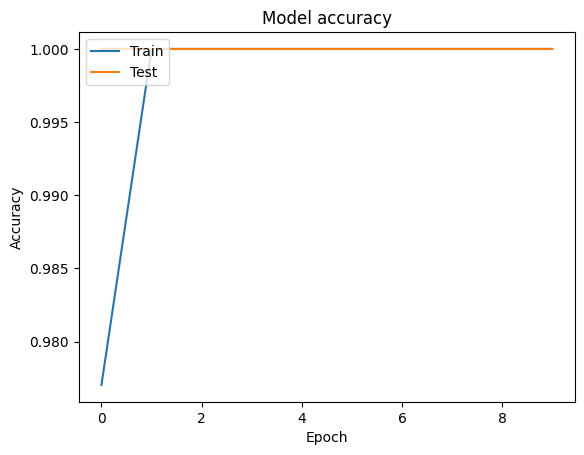

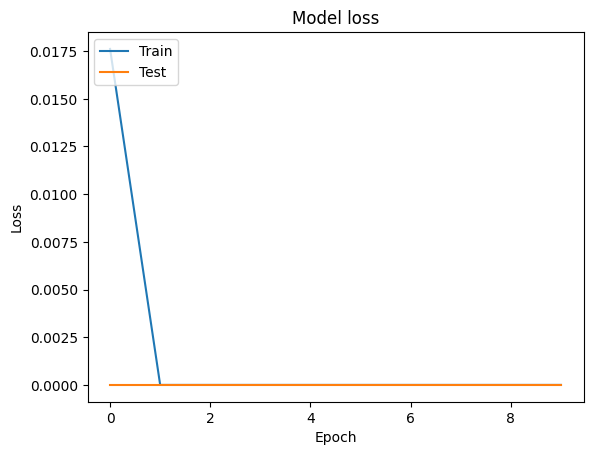

In [20]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [22]:
# For a new image
image_path = "/home/sakshi/ACL_Digital_Internship/Regensburg Pediatric Appendicitis/Dataset/9.1 Appendix.bmp"
new_image = Image.open(image_path).convert("RGB").resize((224, 224))
new_image = np.array(new_image) / 255.0
new_image = np.expand_dims(new_image, axis=0)  # Add batch dimension

# Predict
prediction = model.predict(new_image)
if prediction > 0.5:
    print("Appendicitis")
else:
    print("No Appendicitis")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Appendicitis


In [23]:
# Save the model
model.save("appendicitis_model.h5")


In [26]:
len(os.listdir("/home/sakshi/ACL_Digital_Internship/Regensburg Pediatric Appendicitis/Dataset/US_Pictures"))

2097